# 6: Regresión

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel, RFECV

import warnings
warnings.filterwarnings('ignore')

# Carga de la data

In [2]:
df_train1 = pd.read_csv('df_train1_kpi.csv')
df_train3 = pd.read_csv('df_train3_kpi.csv')
df_train2 = pd.read_csv('df_train2_kpi.csv')
df_train4 = pd.read_csv('df_train4_kpi.csv')

df_test1 = pd.read_csv('df_test1_kpi.csv')
df_test3 = pd.read_csv('df_test3_kpi.csv')
df_test2 = pd.read_csv('df_test2_kpi.csv')
df_test4 = pd.read_csv('df_test4_kpi.csv')

In [3]:
df_train1.head()

,Unnamed: 0,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,...,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul,rul_norm,label
0,0,1.0,1.0,0,0.0,-1.841380,-0.174881,-0.978417,-1.0,0.108606,...,-0.657565,-1.0,-0.847263,0.0,0.0,1.437403,1.267169,191.0,0.994792,0
1,1,1.0,2.0,1,0.0,-1.149998,0.188062,-0.688356,-1.0,0.108606,...,-0.317332,-1.0,-0.847263,0.0,0.0,1.091890,1.311181,190.0,0.989583,0
2,2,1.0,3.0,2,0.0,-0.730978,-0.467632,-0.567306,-1.0,0.108606,...,-0.704589,-1.0,-0.847263,0.0,0.0,0.803963,0.551497,189.0,0.984375,0
3,3,1.0,4.0,3,0.0,-0.730978,-1.357869,-0.833386,-1.0,0.108606,...,-0.544154,-1.0,-0.847263,0.0,0.0,0.400866,0.835661,188.0,0.979167,0
4,4,1.0,5.0,4,0.0,-0.689076,-1.347597,-0.336628,-1.0,0.108606,...,-0.383719,-1.0,-0.168673,0.0,0.0,0.516036,1.127479,187.0,0.973958,0


In [4]:
df_test1.head()

,Unnamed: 0,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,...,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,RUL,label
0,0,1.0,31.0,372.0,0.0,0.262362,-1.375226,-0.871242,-1.0,0.175502,...,-0.867650,-0.808301,-1.0,0.348179,0.0,0.0,-0.582953,0.232044,112,0
1,1,2.0,49.0,50.0,0.0,0.187498,-0.301680,0.912006,-1.0,0.175502,...,-1.182839,0.850296,-1.0,-1.273674,0.0,0.0,-0.582953,-0.879094,98,0
2,2,3.0,126.0,831.0,0.0,1.010999,0.330053,2.117793,-1.0,0.175502,...,-0.735094,-0.480720,-1.0,1.970032,0.0,0.0,0.264215,-0.733956,69,0
3,3,4.0,106.0,268.0,0.0,0.761453,1.285650,0.321081,-1.0,0.175502,...,-0.521040,1.295117,-1.0,1.970032,0.0,0.0,-2.206692,-0.923112,82,0
4,4,5.0,98.0,392.0,0.0,-0.511231,0.368037,2.188106,-1.0,0.175502,...,-1.296739,0.357199,-1.0,1.159106,0.0,0.0,-1.006537,0.904199,91,0


In [5]:
df_train1.drop('Unnamed: 0', axis = 1, inplace=True)
df_train3.drop('Unnamed: 0', axis = 1, inplace=True)
df_train2.drop('Unnamed: 0', axis = 1, inplace=True)
df_train4.drop('Unnamed: 0', axis = 1, inplace=True)

df_test1.drop('Unnamed: 0', axis = 1, inplace=True)
df_test3.drop('Unnamed: 0', axis = 1, inplace=True)
df_test2.drop('Unnamed: 0', axis = 1, inplace=True)
df_test4.drop('Unnamed: 0', axis = 1, inplace=True)

In [6]:
df_train1.head()

,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,sensorMeasure7,...,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul,rul_norm,label
0,1.0,1.0,0,0.0,-1.841380,-0.174881,-0.978417,-1.0,0.108606,1.180037,...,-0.657565,-1.0,-0.847263,0.0,0.0,1.437403,1.267169,191.0,0.994792,0
1,1.0,2.0,1,0.0,-1.149998,0.188062,-0.688356,-1.0,0.108606,0.471929,...,-0.317332,-1.0,-0.847263,0.0,0.0,1.091890,1.311181,190.0,0.989583,0
2,1.0,3.0,2,0.0,-0.730978,-0.467632,-0.567306,-1.0,0.108606,1.063953,...,-0.704589,-1.0,-0.847263,0.0,0.0,0.803963,0.551497,189.0,0.984375,0
3,1.0,4.0,3,0.0,-0.730978,-1.357869,-0.833386,-1.0,0.108606,1.284512,...,-0.544154,-1.0,-0.847263,0.0,0.0,0.400866,0.835661,188.0,0.979167,0
4,1.0,5.0,4,0.0,-0.689076,-1.347597,-0.336628,-1.0,0.108606,0.762137,...,-0.383719,-1.0,-0.168673,0.0,0.0,0.516036,1.127479,187.0,0.973958,0


In [7]:
df_test1.head()

,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,sensorMeasure7,...,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,RUL,label
0,1.0,31.0,372.0,0.0,0.262362,-1.375226,-0.871242,-1.0,0.175502,0.971856,...,-0.867650,-0.808301,-1.0,0.348179,0.0,0.0,-0.582953,0.232044,112,0
1,2.0,49.0,50.0,0.0,0.187498,-0.301680,0.912006,-1.0,0.175502,-0.348956,...,-1.182839,0.850296,-1.0,-1.273674,0.0,0.0,-0.582953,-0.879094,98,0
2,3.0,126.0,831.0,0.0,1.010999,0.330053,2.117793,-1.0,0.175502,-1.713795,...,-0.735094,-0.480720,-1.0,1.970032,0.0,0.0,0.264215,-0.733956,69,0
3,4.0,106.0,268.0,0.0,0.761453,1.285650,0.321081,-1.0,0.175502,-1.640417,...,-0.521040,1.295117,-1.0,1.970032,0.0,0.0,-2.206692,-0.923112,82,0
4,5.0,98.0,392.0,0.0,-0.511231,0.368037,2.188106,-1.0,0.175502,-0.686497,...,-1.296739,0.357199,-1.0,1.159106,0.0,0.0,-1.006537,0.904199,91,0


In [8]:
caracteristicas1 = df_train1.drop(['unitNumber', 'cycle',
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

caracteristicas3 = df_train3.drop(['unitNumber', 'cycle',
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

caracteristicas2 = df_train2.drop(['unitNumber', 'cycle',
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

caracteristicas4 = df_train4.drop(['unitNumber', 'cycle', 
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

In [9]:
def variables(df_train, df_test, caracteristicas):
    X_train = df_train[caracteristicas]
    X_test = df_test[caracteristicas]

    y_train = df_train.rul
    y_test = df_test.RUL
    
    return X_train, y_train, X_test, y_test

In [10]:
X_train, y_train, X_test, y_test = variables(df_train1, df_test1, caracteristicas1)

# Modelado con técnicas de regresión

In [11]:
X_train.head()

,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,sensorMeasure7,sensorMeasure8,sensorMeasure9,...,sensorMeasure12,sensorMeasure13,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21
0,0,0.0,-1.841380,-0.174881,-0.978417,-1.0,0.108606,1.180037,-0.543444,-0.869179,...,0.365199,-1.103151,-0.271311,-0.657565,-1.0,-0.847263,0.0,0.0,1.437403,1.267169
1,1,0.0,-1.149998,0.188062,-0.688356,-1.0,0.108606,0.471929,-0.830806,-0.965539,...,1.225379,-1.032063,-0.645752,-0.317332,-1.0,-0.847263,0.0,0.0,1.091890,1.311181
2,2,0.0,-0.730978,-0.467632,-0.567306,-1.0,0.108606,1.063953,-0.327922,-0.562371,...,1.419613,-0.960975,-0.554374,-0.704589,-1.0,-0.847263,0.0,0.0,0.803963,0.551497
3,3,0.0,-0.730978,-1.357869,-0.833386,-1.0,0.108606,1.284512,0.174963,-0.719638,...,1.260064,-0.250099,-0.522864,-0.544154,-1.0,-0.847263,0.0,0.0,0.400866,0.835661
4,4,0.0,-0.689076,-1.347597,-0.336628,-1.0,0.108606,0.762137,-0.543444,-0.461920,...,1.100514,-0.818800,-0.524439,-0.383719,-1.0,-0.168673,0.0,0.0,0.516036,1.127479


In [12]:
y_train.head()

0    191.0
1    190.0
2    189.0
3    188.0
4    187.0
Name: rul, dtype: float64

In [13]:
X_test.head()

,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,sensorMeasure7,sensorMeasure8,sensorMeasure9,...,sensorMeasure12,sensorMeasure13,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21
0,372.0,0.0,0.262362,-1.375226,-0.871242,-1.0,0.175502,0.971856,0.157677,-0.175323,...,0.075254,-0.193190,-0.867650,-0.808301,-1.0,0.348179,0.0,0.0,-0.582953,0.232044
1,50.0,0.0,0.187498,-0.301680,0.912006,-1.0,0.175502,-0.348956,0.505782,-1.192854,...,-0.014081,0.333847,-1.182839,0.850296,-1.0,-1.273674,0.0,0.0,-0.582953,-0.879094
2,831.0,0.0,1.010999,0.330053,2.117793,-1.0,0.175502,-1.713795,1.550097,-0.800015,...,-1.639976,1.212242,-0.735094,-0.480720,-1.0,1.970032,0.0,0.0,0.264215,-0.733956
3,268.0,0.0,0.761453,1.285650,0.321081,-1.0,0.175502,-1.640417,1.027939,-0.621532,...,0.236057,0.685205,-0.521040,1.295117,-1.0,1.970032,0.0,0.0,-2.206692,-0.923112
4,392.0,0.0,-0.511231,0.368037,2.188106,-1.0,0.175502,-0.686497,0.505782,-0.386178,...,-1.336237,1.387921,-1.296739,0.357199,-1.0,1.159106,0.0,0.0,-1.006537,0.904199


In [14]:
y_test.head()

0    112
1     98
2     69
3     82
4     91
Name: RUL, dtype: int64

__Se creará una función que permite calcular las metricas de regresión más importantes__

In [15]:
def metricas(modelo, real, prediccion):
    
    """Calcula las metricas principales de regresión.
    
    Args:
        modelo (str): identificador del modelo empleado.
        real (series): Contiene los valores de las etiquetas de prueba.
        prediccion (series): Contiene los valores predichos.
        
    Returns:
        dataframe: Todas las metricas en un dataframe.
    
    
    """
    
    
    metricas_regresion = {'Root Mean Squared Error' : metrics.mean_squared_error(real, prediccion)**0.5, 
                         'Mean Absolute Error' : metrics.mean_absolute_error(real, prediccion),
                         'R^2' : metrics.r2_score(real, prediccion),
                         'Explained Variance' : metrics.explained_variance_score(real, prediccion),
                        }
    
    df_metricas = pd.DataFrame.from_dict(metricas_regresion, orient= 'index' )
    df_metricas.columns = [modelo]
    
    return df_metricas

__Se creará una función que permita graficar los residuales de regresión.__

# 6.1: Regresión Lineal

In [16]:
# Regresión lineal

linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

print(' R^2 entrenamiento: %.3f \n\n R^2 prueba: %.3f' %(metrics.r2_score(y_train, y_train_predict), 
                                                  metrics.r2_score(y_test, y_test_predict)))

linreg_metrics = metricas('Regresión Lineal', y_test, y_test_predict)
linreg_metrics

 R^2 entrenamiento: 0.568 

 R^2 prueba: 0.064


,Regresión Lineal
Root Mean Squared Error,40.197707
Mean Absolute Error,31.621003
R^2,0.064286
Explained Variance,0.273457


In [17]:
lineal_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

lineal_pred = pd.DataFrame.from_dict(lineal_predic).T
lineal_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,112.000000,98.000000,69.000000,82.000000,91.000000,93.000000,91.000000,95.000000,111.000000,96.000000,...,38.000000,20.000000,85.000000,55.000000,128.000000,137.000000,82.000000,59.000000,117.00000,20.000000
Predicción,140.118296,94.852709,44.164031,66.497803,79.605061,90.127601,97.839173,60.513216,78.176277,85.479029,...,5.250065,-13.346592,7.133773,25.538706,123.348493,146.436369,67.711289,57.991018,135.93145,-99.031229


# 6.2: Regresión Polinomial

In [18]:
# Regresión polinomial

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

polyreg = linear_model.LinearRegression()
polyreg.fit(X_train_poly, y_train)

y_test_predict = polyreg.predict(X_test_poly)
y_train_predict = polyreg.predict(X_train_poly)

print(' R^2 entrenamiento: %.3f \n\n R^2 prueba: %.3f' %(metrics.r2_score(y_train, y_train_predict), 
                                                  metrics.r2_score(y_test, y_test_predict)))

polyreg_metrics = metricas('Regresión Polinomial', y_test, y_test_predict)
polyreg_metrics

 R^2 entrenamiento: 0.619 

 R^2 prueba: -0.594


,Regresión Polinomial
Root Mean Squared Error,52.467854
Mean Absolute Error,42.243088
R^2,-0.594142
Explained Variance,-0.201883


In [19]:
poly_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

poly_pred = pd.DataFrame.from_dict(poly_predic).T
poly_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,112.000000,98.000000,69.000000,82.000000,91.000000,93.000000,91.000000,95.000000,111.000000,96.000000,...,38.000000,20.000000,85.00000,55.000000,128.000000,137.00000,82.000000,59.000000,117.000000,20.000000
Predicción,150.024157,141.120315,-14.790849,61.372203,64.725329,95.682341,58.446357,42.241734,53.655038,67.997495,...,-19.017037,-25.079609,-7.13525,42.426779,135.290547,145.36126,47.452356,10.301274,41.584206,41.714784


# 6.3: Árboles de Decisión

In [20]:
# Regresión por árboles de decisión

dtreg = DecisionTreeRegressor(max_depth=7)
dtreg.fit(X_train, y_train)

y_test_predict = dtreg.predict(X_test)
y_train_predict = dtreg.predict(X_train)

print(' R^2 entrenamiento: %.3f \n\n R^2 prueba: %.3f' %(metrics.r2_score(y_train, y_train_predict), 
                                                  metrics.r2_score(y_test, y_test_predict)))

dtreg_metrics = metricas('Árboles de Decisión', y_test, y_test_predict)
dtreg_metrics

 R^2 entrenamiento: 0.621 

 R^2 prueba: 0.242


,Árboles de Decisión
Root Mean Squared Error,36.187674
Mean Absolute Error,29.770814
R^2,0.241664
Explained Variance,0.353727


In [21]:
dt_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

dt_pred = pd.DataFrame.from_dict(dt_predic).T
dt_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,112.000000,98.000000,69.000000,82.000000,91.000000,93.000000,91.000000,95.000000,111.000000,96.000000,...,38.000000,20.000000,85.000000,55.00000,128.000000,137.000000,82.000000,59.000000,117.000000,20.000000
Predicción,155.638821,47.894737,15.196429,50.034483,74.426316,129.522549,69.734375,56.468354,59.738318,62.803279,...,7.704082,9.931548,18.619433,4.03866,141.994521,139.552632,34.708333,47.894737,83.896226,7.704082


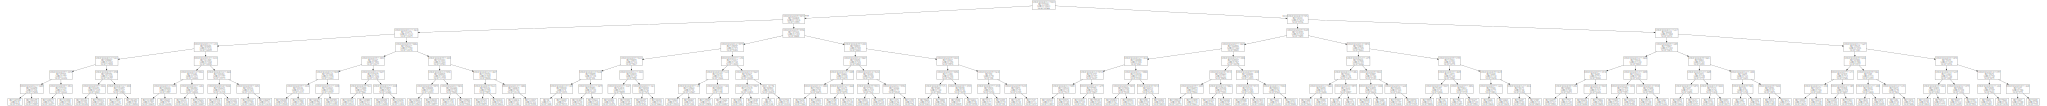

In [22]:
import graphviz

tree = export_graphviz(dtreg, out_file=None, feature_names=caracteristicas1)
graphviz.Source(tree)

In [23]:
atrib = {}

for atributo, importancia in zip(caracteristicas1, dtreg.feature_importances_):
    atrib[atributo] = importancia

importancia = pd.DataFrame.from_dict(atrib, orient = 'index').rename(columns = {0: 'Importancia'})
importancia.sort_values(by ='Importancia', ascending=False)

,Importancia
sensorMeasure11,0.676942
sensorMeasure9,0.160729
sensorMeasure4,0.084961
sensorMeasure12,0.027238
sensorMeasure7,0.013400
sensorMeasure13,0.009256
sensorMeasure14,0.008265
sensorMeasure8,0.004647
sensorMeasure15,0.003950
sensorMeasure3,0.002893


In [24]:
dtr_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

dtr_pred = pd.DataFrame.from_dict(dtr_predic).T
dtr_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,112.000000,98.000000,69.000000,82.000000,91.000000,93.000000,91.000000,95.000000,111.000000,96.000000,...,38.000000,20.000000,85.000000,55.00000,128.000000,137.000000,82.000000,59.000000,117.000000,20.000000
Predicción,155.638821,47.894737,15.196429,50.034483,74.426316,129.522549,69.734375,56.468354,59.738318,62.803279,...,7.704082,9.931548,18.619433,4.03866,141.994521,139.552632,34.708333,47.894737,83.896226,7.704082


# 6.4: Random Forest

In [25]:
rf = RandomForestRegressor(n_estimators=100, max_depth=4, max_features=3, n_jobs=-1)
rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

print(' R^2 entrenamiento: %.3f \n\n R^2 prueba: %.3f' %(metrics.r2_score(y_train, y_train_predict), 
                                                  metrics.r2_score(y_test, y_test_predict)))

rf_metrics = metricas('Random Forest', y_test, y_test_predict)
rf_metrics

 R^2 entrenamiento: 0.588 

 R^2 prueba: 0.599


,Random Forest
Root Mean Squared Error,26.323140
Mean Absolute Error,19.453492
R^2,0.598749
Explained Variance,0.652335


In [26]:
rf_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

rf_pred = pd.DataFrame.from_dict(rf_predic).T
rf_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,112.000000,98.000000,69.000000,82.000000,91.000000,93.000000,91.000000,95.000000,111.000000,96.000000,...,38.000000,20.000000,85.000000,55.000000,128.000000,137.00000,82.000000,59.000000,117.000000,20.000000
Predicción,132.307811,85.600544,46.238247,57.635772,88.375147,93.483997,83.083517,50.070099,76.583397,84.732434,...,18.523652,15.205155,22.778882,30.466016,128.374804,140.03783,65.814268,56.388701,110.697468,16.515121


# 6.5: Comparando las métricas de regresión

In [27]:
all_metricas = pd.concat([linreg_metrics, polyreg_metrics, dtreg_metrics, rf_metrics], axis = 1)
all_metricas

,Regresión Lineal,Regresión Polinomial,Árboles de Decisión,Random Forest
Root Mean Squared Error,40.197707,52.467854,36.187674,26.323140
Mean Absolute Error,31.621003,42.243088,29.770814,19.453492
R^2,0.064286,-0.594142,0.241664,0.598749
Explained Variance,0.273457,-0.201883,0.353727,0.652335
